In [3]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2018-02-25T15:09:16+01:00

CPython 3.6.4
IPython 6.2.1

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores  : 8
interpreter: 64bit


### Propagación hacia adelante (forward propagation)

Vamos a implementar una red neuronal con capacidad de hacer predicciones mediante la propagación hacia adelante

### Cargamos los datos

Vamos a usar el dataset del cancer de mama (Breast Cancer Dataset)

In [53]:
import numpy as np

In [54]:
from sklearn.datasets import load_breast_cancer

In [55]:
data = load_breast_cancer()

In [56]:
X, y = data.data, data.target

Para poder usar la red neuronal que hemos visto con 4 unidades en la capa de entrada, usaremos solo las 4 primeras variables independientes

In [57]:
X = data.data[:,:4]

In [58]:
X.shape

(569, 4)

In [59]:
y[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [60]:
X[:10]

array([[  17.99,   10.38,  122.8 , 1001.  ],
       [  20.57,   17.77,  132.9 , 1326.  ],
       [  19.69,   21.25,  130.  , 1203.  ],
       [  11.42,   20.38,   77.58,  386.1 ],
       [  20.29,   14.34,  135.1 , 1297.  ],
       [  12.45,   15.7 ,   82.57,  477.1 ],
       [  18.25,   19.98,  119.6 , 1040.  ],
       [  13.71,   20.83,   90.2 ,  577.9 ],
       [  13.  ,   21.82,   87.5 ,  519.8 ],
       [  12.46,   24.04,   83.97,  475.9 ]])

Para entrenar modelos de deep learning es importante que las variables estén en la misma escala, por ello vamos a estandarizar las variables independientes

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
x_estandardizador = StandardScaler()
X_std = x_estandardizador.fit_transform(X)

Ésta es el modelo que vamos a crear

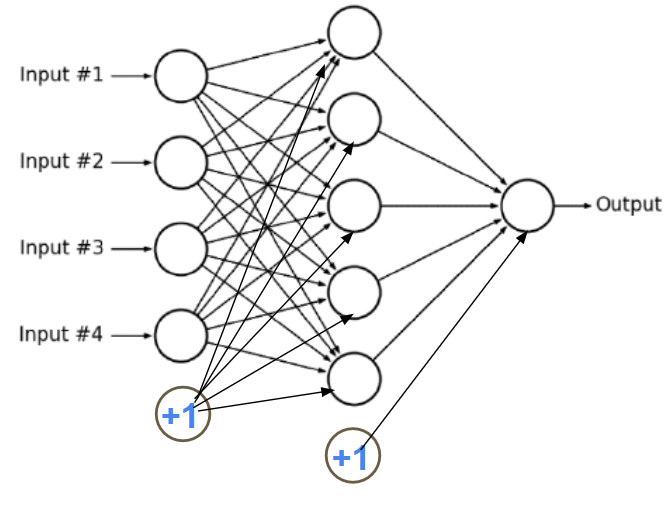

In [63]:
from IPython.display import Image
Image("../../media/mlp_con_bias.PNG")

En primer lugar, tenemos que definir una capa, creamos la clase `Layer` que tiene una dimension de entrada, una de salida, y una función de activación

Inicialmente sus pesos se generan al azar.

In [64]:
class Layer:
    def __init__(self, dim_input, dim_output, fn_activacion, nombre):
        self.dim_input = dim_input
        self.dim_output = dim_output
        self.generar_pesos((dim_output, dim_input))
        self.generar_bias(dim_output)
        self.fn_activacion = fn_activacion
        self.nombre = nombre
        
    def __repr__(self):
        return """
        Capa {}. tamaño input: {}. tamaño output: {}.
        pesos: {}
        bias: {}
        """.format(
        self.nombre, self.dim_input, self.dim_output,
        self.w, self.b)
    
    def generar_pesos(self, dimensiones):
        self.w = np.random.random(dimensiones)
        
    def generar_bias(self, dim_output):
        self.b = np.random.random((dim_output,))
    
    def activar(self, x):
        return self.fn_activacion(self.w @ x + self.b)

Para hacer propagación hacia adelante necesitamos la función de activación,  en este ejemplo voy a usar la función sigmoide como activación de la capa oculta

In [65]:
def fn_sigmoide(x):
    return 1/(1+np.exp(-x))

In [66]:
n_input = 4
n_oculta = 5
n_output = 1

In [76]:
capa_oculta = Layer(n_input, n_oculta, fn_sigmoide, "oculta")

capa_salida = Layer(n_oculta, n_output, fn_sigmoide, "salida")

In [68]:
print(capa_oculta)


        Capa oculta. tamaño input: 4. tamaño output: 5.
        pesos: [[0.76989362 0.94052961 0.96601278 0.18662799]
 [0.94046284 0.67595128 0.82422199 0.25656309]
 [0.68940842 0.07790624 0.26575141 0.32266884]
 [0.69413534 0.45792478 0.45754021 0.7314046 ]
 [0.40361917 0.82510239 0.8957277  0.60930653]]
        bias: [0.18221142 0.60232781 0.10389477 0.93834854 0.82862769]
        


Ahora podemos crear una red neuronal, que básicamente tiene una lista con las capas que tiene y el método para la propagación hacia adelante

In [69]:
class RedNeuronal:
    def __init__(self):
        self.layers = []
        
    def add_layer(self, layer):
        self.layers.append(layer)
        
    def forward(self, x):
        print("""
        input {}
        """.format(x))
        for layer in self.layers:
            x = layer.activar(x)
            print(layer)
            print("""
            output: {}
            """.format(x))
        return x

In [77]:
red = RedNeuronal()

red.add_layer(capa_oculta)
red.add_layer(capa_salida)

In [71]:
indice_aleatorio = np.random.permutation(X.shape[0])

x0 = X_std[indice_aleatorio[0]]
y0 = y[indice_aleatorio[0]]
print(x0, y0)

[ 0.12857557 -1.310057    0.09560108  0.01112299] 1


In [78]:
red.forward(x0)


        input [ 0.12857557 -1.310057    0.09560108  0.01112299]
        

        Capa oculta. tamaño input: 4. tamaño output: 5.
        pesos: [[0.23760568 0.6447661  0.97606275 0.08792639]
 [0.21862783 0.63325503 0.27245582 0.90391685]
 [0.69973667 0.92911037 0.92346896 0.8266613 ]
 [0.14487328 0.29508519 0.03497706 0.36980861]
 [0.55323248 0.32947638 0.95190433 0.43624034]]
        bias: [0.99183493 0.51819605 0.6261065  0.17947169 0.8504826 ]
        

            output: [0.56758274 0.43851461 0.40043992 0.45486759 0.64240947]
            

        Capa salida. tamaño input: 5. tamaño output: 1.
        pesos: [[0.09308302 0.46724233 0.47149983 0.45122482 0.17216916]]
        bias: [0.10599816]
        

            output: [0.70440872]
            


array([0.70440872])

In [73]:
y0

1